In [3]:
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite
from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba
import pandas

In [13]:
model = read_sbml_model('data/iML1515_het.xml')

<Axes: xlabel='loopless', ylabel='nominal'>

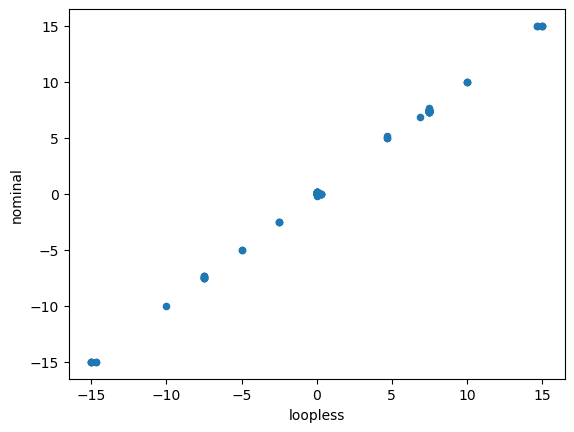

In [14]:
sol1 = model.optimize()

model.objective = model.reactions.HACD1

nominal = model.optimize()
loopless = loopless_solution(model)

df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))

df.plot.scatter(x='loopless', y='nominal')

In [15]:
solution = pfba(model)
print("parsimonious solution: status = " + solution.status)
print("basal flux: HADC1 = %.4f" % sol1.fluxes["HACD1"], "mmol/(gdw*h)")
print("loopless solution flux: HADC1 = %.4f" % solution.fluxes["HACD1"], "mmol/(gdw*h)")

parsimonious solution: status = optimal
basal flux: HADC1 = 0.3121 mmol/(gdw*h)
loopless solution flux: HADC1 = 7.5000 mmol/(gdw*h)
